# Python geoscience

In [1]:
!pwd

/c/Users/LENOVO/Documents/AGILE_JNT/python_practiceJG


In [4]:
%whos

Interactive namespace is empty.


In [6]:
%magic

## Arrays

In [87]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# this is just to make the output
np.set_printoptions(precision=3 , suppress= True) 

In [14]:
temp=np.loadtxt('Ham_3column.txt')
print(temp, temp.shape)

[[1891.    1.    1.  -72.]
 [1891.    1.    2.  -43.]
 [1891.    1.    3.  -32.]
 ...
 [2014.    8.   29.  216.]
 [2014.    8.   30.  198.]
 [2014.    8.   31.  184.]] (45168, 4)


In [16]:
print(temp.size,type(temp),temp.dtype)


180672 <class 'numpy.ndarray'> float64


In [18]:
print(temp[0,0])
temp[0,0]='Year'

1891.0


ValueError: could not convert string to float: 'Year'

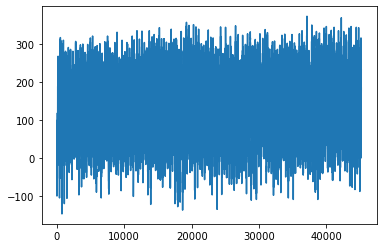

In [23]:
import matplotlib.pyplot as plt
plt.plot(temp[:,3])
plt.show()

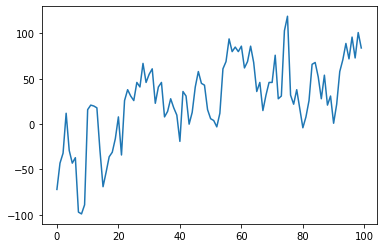

In [29]:
plt.plot(temp[:100,3])

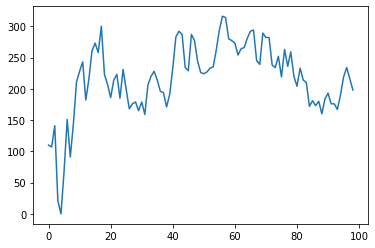

In [25]:
plt.plot(temp[-100:-1,3])

In [30]:
# mask can be created selecting all raws 
#whre third raw days equals 10
mask = (temp[:,2]==10)

In [34]:
temp[mask][:20,:]

array([[1891.,    1.,   10.,  -89.],
       [1891.,    2.,   10.,  -19.],
       [1891.,    3.,   10.,   32.],
       [1891.,    4.,   10.,   84.],
       [1891.,    5.,   10.,  188.],
       [1891.,    6.,   10.,  130.],
       [1891.,    7.,   10.,  161.],
       [1891.,    8.,   10.,  171.],
       [1891.,    9.,   10.,  221.],
       [1891.,   10.,   10.,  181.],
       [1891.,   11.,   10.,   80.],
       [1891.,   12.,   10.,  107.],
       [1892.,    1.,   10.,   -4.],
       [1892.,    2.,   10.,   36.],
       [1892.,    3.,   10.,   16.],
       [1892.,    4.,   10.,  146.],
       [1892.,    5.,   10.,  195.],
       [1892.,    6.,   10.,  205.],
       [1892.,    7.,   10.,  209.],
       [1892.,    8.,   10.,  155.]])

In [35]:
# You don't have to create separate variable 
#for mask, but apply it directly. 
#Here instead of first five rows 
#I show five last rows:
temp[temp[:,2]==10][-5:,:]

array([[2014.,    4.,   10.,  116.],
       [2014.,    5.,   10.,   27.],
       [2014.,    6.,   10.,  300.],
       [2014.,    7.,   10.,  277.],
       [2014.,    8.,   10.,  259.]])

In [36]:
# conditions can be  combined 

temp[(temp[:,2]>=10)&(temp[:,2]<=12)][0:10,:]

array([[1891.,    1.,   10.,  -89.],
       [1891.,    1.,   11.,   16.],
       [1891.,    1.,   12.,   21.],
       [1891.,    2.,   10.,  -19.],
       [1891.,    2.,   11.,   36.],
       [1891.,    2.,   12.,   31.],
       [1891.,    3.,   10.,   32.],
       [1891.,    3.,   11.,   46.],
       [1891.,    3.,   12.,   46.],
       [1891.,    4.,   10.,   84.]])

In [39]:
temp[(temp[:,2]>=10)&(temp[:,2]<=12)&(temp[:,1]<=6)][0:,:]

array([[1891.,    1.,   10.,  -89.],
       [1891.,    1.,   11.,   16.],
       [1891.,    1.,   12.,   21.],
       [1891.,    2.,   10.,  -19.],
       [1891.,    2.,   11.,   36.],
       [1891.,    2.,   12.,   31.],
       [1891.,    3.,   10.,   32.],
       [1891.,    3.,   11.,   46.],
       [1891.,    3.,   12.,   46.],
       [1891.,    4.,   10.,   84.]])

In [41]:
temp[(temp[:,2]>=10)&(temp[:,2]<=12)&(temp[:,1]>=6)&(temp[:,1]<=9)][0:10,:]

array([[1891.,    6.,   10.,  130.],
       [1891.,    6.,   11.,  123.],
       [1891.,    6.,   12.,  136.],
       [1891.,    7.,   10.,  161.],
       [1891.,    7.,   11.,  165.],
       [1891.,    7.,   12.,  197.],
       [1891.,    8.,   10.,  171.],
       [1891.,    8.,   11.,  162.],
       [1891.,    8.,   12.,  177.],
       [1891.,    9.,   10.,  221.]])

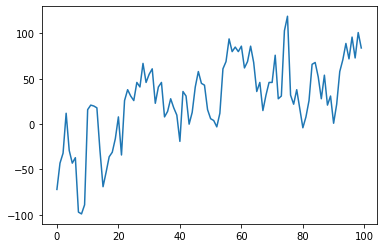

In [42]:
plt.plot(temp[:100,3])

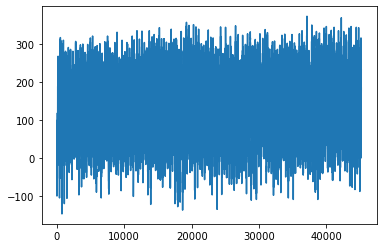

In [44]:
temp2=temp[:,3].copy()
plt.plot(temp2)

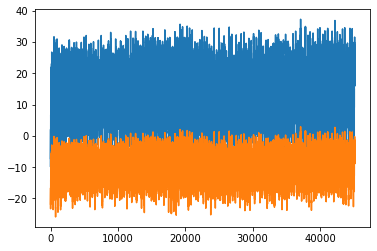

In [50]:
tempC=(temp2)/10
plt.plot(tempC)
tempF=(tempC-32)/1.8
plt.plot(tempF)

In [48]:
temp_values=temp[:,3]/10.
temp_values

array([-7.2, -4.3, -3.2, ..., 21.6, 19.8, 18.4])

In [52]:
Min=temp_values.min()
print(Min)

-14.6


In [54]:
Max=temp_values.max()
print(Max)

37.3


In [55]:
MN=temp_values.mean()
print(MN)

12.488779667020898


In [58]:
SUMA=np.sum(temp_values)
print(SUMA)

564093.2


In [63]:
mean100=temp_values[:100].mean()
print(mean100)

2.738


In [64]:
# save data
np.savetxt('tempvalues.csv',temp[:,3]/10.,fmt='%.4f')

In [65]:
f=open('tem_onlyvalues.bin','w')
temp[:,3].tofile(f)
f.close

<function TextIOWrapper.close()>

In [67]:
#timeseries=np.loadtxt('C2669510091_30M.091')

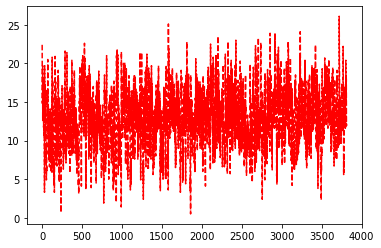

In [86]:
TEMPOCT=temp[temp[:,1]==10][:,3]/10.
#EMPDIAS=temp[temp[:,1]==10][:,]

plt.plot(TEMPOCT,'r--')

## Data format

In [89]:
# opening binary
#ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly/nt_200709_f13_v1.1_n.bin
    
#import requests
#url='ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly/nt_200709_f13_v1.1_n.bin'
#r=requests.get(url,allow_redirects=True)
#r=requests.get(url,allow_redirects=True)
#open('nt_200709_f13_v1.1_n.bin','wb').write(r.content)

#file_name = "Golden_State.pkl"


In [90]:
# create file id
ice = np.fromfile('nt_200709_f13_v1.1_n.bin', dtype='uint8')

In [93]:
# reshaping
#e use uint8 data type. List of numpy data types
#he file format consists of a 300-byte descriptive
#header followed by a two-dimensional array.
ice=ice[300:]
ice=ice.reshape(448,304)

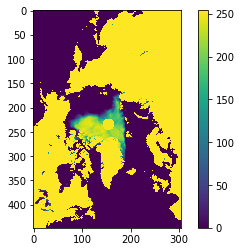

In [96]:
plt.imshow(ice)
plt.colorbar()
plt.show()

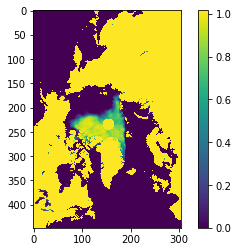

In [97]:
#To convert to the fractional parameter range 
#of 0.0 to 1.0, divide the scaled data in the
#file by 250.
ice = ice/250.
plt.imshow(ice)
plt.colorbar();

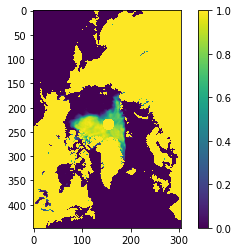

In [98]:
#masking all land ans misssing values
plt.imshow(ice, vmin=0, vmax=1.0)
plt.colorbar();

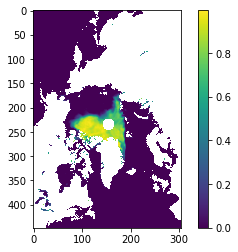

In [99]:
ice_masked = np.ma.masked_greater(ice, 1.0)
plt.imshow(ice_masked, interpolation='none')
plt.colorbar();

Masking in this case is similar to using NaN in Matlab. More about NumPy masked arrays
https://numpy.org/doc/stable/reference/maskedarray.html

# save Binaries

In [101]:
fid=open('ice2007.bin','wb')
ice.tofile(fid)
fid.close()

# SciPY
General purpose scientific library (that consist of bunch of sublibraries) and builds on NumPy arrays.

- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fftpack)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse Eigenvalue Problems (scipy.sparse)
- Statistics (scipy.stats)
- Multi-dimensional image processing (scipy.ndimage)
- File IO (scipy.io)
- We are going to use only scipy.io library.

In [107]:
#import scipy.io as io
from scipy.io import loadmat

In [114]:
#open file
# !wget https://www.dropbox.com/s/0kuzvz03gw6d393/PHC_jan.mat
all_variables = io.loadmat('PHC_jan.mat')

In [115]:
all_variables.keys()

dict_keys(['__header__', '__version__', '__globals__', 'LAT', 'LON', 'DEPTH', 'PTEMP1'])

In [116]:
# need on only PTEMP1 (3d pótential temperature)
temp=all_variables['PTEMP1']

In [117]:
temp.shape

(33, 180, 360)

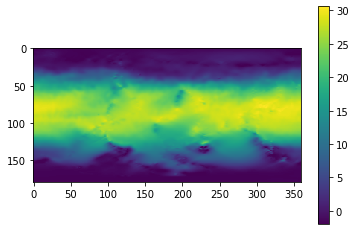

In [120]:
#variable shape
plt.imshow(temp[0,:,:])
plt.colorbar()
plt.show()

In [125]:

source = io.loadmat('source.mat')
velocity_model = io.loadmat('velocity_model.mat')
recorded_data = io.loadmat('recorded_data.mat')
print(source.keys())
print(velocity_model.keys())
print(recorded_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'source_sig'])
dict_keys(['__header__', '__version__', '__globals__', 'vp_smooth'])
dict_keys(['__header__', '__version__', '__globals__', 'recorded_data'])


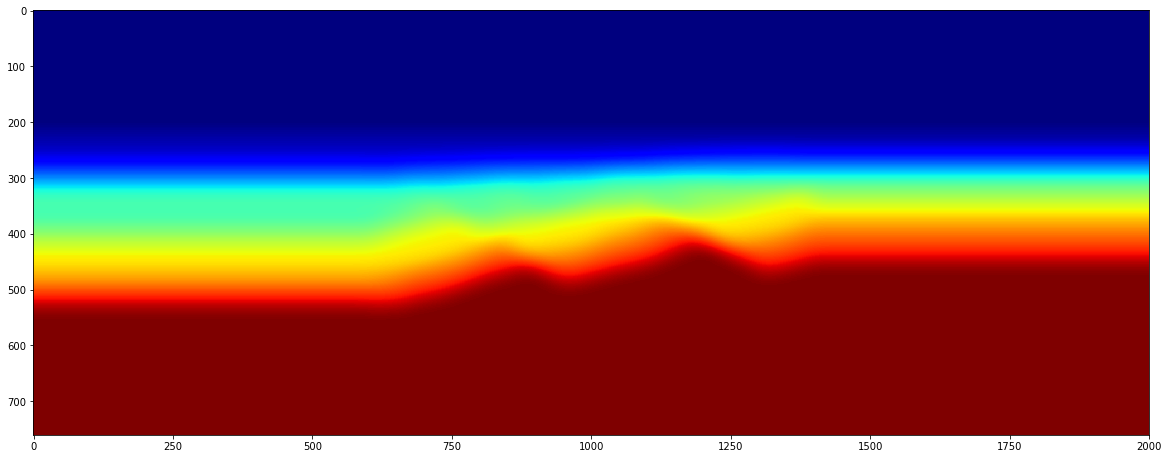

In [205]:
velocity_smooth=velocity_model['vp_smooth']
velocity_smooth.shape
plt.figure(figsize=(20,20))
plt.imshow(velocity_smooth,cmap='jet')
#plt.colorbar()
plt.show()


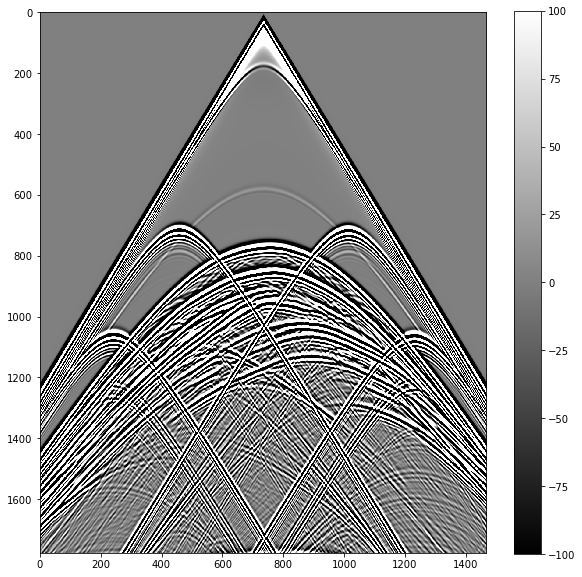

In [160]:
data=recorded_data['recorded_data']
data.shape
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='gray')
plt.clim(-1e2,1e2)
plt.colorbar()
plt.show()

##  Open netCDF files

scipy works with netCDF files but obsolte, instead of that use puthon module, 

In [168]:
from netCDF4 import Dataset

In [175]:
# !wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/air.2m.gauss.2016.nc

#Alternative for the times of US goverment shutdowns:
#!wget http://database.rish.kyoto-u.ac.jp/arch/ncep/data/ncep.reanalysis/surface/air.sig995.2012.nc
import requests

print('Beginning file download with requests')

url = 'http://database.rish.kyoto-u.ac.jp/arch/ncep/data/ncep.reanalysis/surface/air.sig995.2012.nc'
r = requests.get(url)

with open('air.sig995.2012.nc', 'wb') as f:
    f.write(r.content)

# Retrieve HTTP meta-data
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

Beginning file download with requests
200
application/x-netcdf
None


In [215]:
# create file id
fnc = Dataset('air.sig995.2012.nc')

In [216]:
# It's not really file id, it's netcdf_file object, 
# that have some methods and attributes:
fnc.description

'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'

In [217]:
fnc.history

'created 2011/12 by Hoop (netCDF2.3)\nConverted to chunked, deflated non-packed NetCDF4 2014/09'

In [228]:
#list
fnc.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  units: degrees_north
                  actual_range: [ 90. -90.]
                  long_name: Latitude
                  standard_name: latitude
                  axis: Y
              unlimited dimensions: 
              current shape = (73,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  units: degrees_east
                  long_name: Longitude
                  actual_range: [  0.  357.5]
                  standard_name: longitude
                  axis: X
              unlimited dimensions: 
              current shape = (144,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: Time
                 

In [229]:
#acess information about variable
air = fnc.variables['air']

In [230]:
#This time we create netcdf_variable object, 
#that contain among other things attributes
#of the netCDF variable as well as data themselves


In [231]:
air.actual_range

array([191.1, 323. ], dtype=float32)

In [232]:
air.long_name

'4xDaily Air temperature at sigma level 995'

In [233]:
air.units

'degK'

In [234]:
air.shape

(1464, 73, 144)

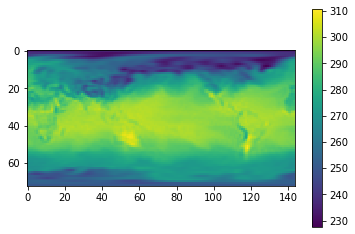

In [235]:
#We can access the data by simply using array
#syntax. Here we show first time step of our
#data set:
plt.imshow(air[0,:,:])
plt.colorbar();
plt.show()

In [236]:
#air.actual_range-273

In [237]:
#get lat and lon variables from netCDF
lat = fnc.variables['lat']
lon = fnc.variables['lon']
print('latitude shape:',lat.shape)
print('longitude shape:',lon.shape)
print(lat.long_name,lat.units,)
print(lon.long_name,lon.units)

latitude shape: (73,)
longitude shape: (144,)
Latitude degrees_north
Longitude degrees_east


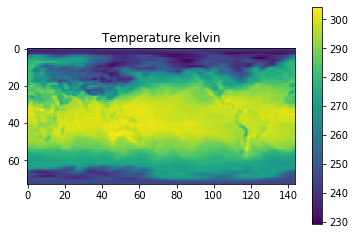

In [238]:
plt.imshow(air[100,:,:])
plt.colorbar();
plt.title('Temperature kelvin')
plt.show()

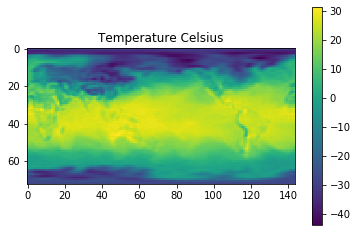

In [242]:
airC=air[:,:,:].copy()
airC=airC-273
plt.imshow(airC[100,:,:])
plt.colorbar();
plt.title('Temperature Celsius')
plt.show()

## Save NetCDF file
minimalistic variant

In [244]:
!rm test2_netcdf.nc
fw = Dataset('test2_netcdf.nc', 'w')

fw.createDimension('t', 366)
fw.createDimension('y', 94)
fw.createDimension('x', 192)

air_var = fw.createVariable( 'air','float32', ('t', 'y', 'x'))
air_var[:] = air[:]
fw.close()

rm: cannot remove 'test2_netcdf.nc': Device or resource busy


PermissionError: [Errno 13] Permission denied: b'test2_netcdf.nc'

In [245]:
!rm test_netcdf.nc
fw = Dataset('test_netcdf.nc', 'w')

fw.createDimension('TIME', 366)
fw.createDimension('LATITUDE', 94)
fw.createDimension('LONGITUDE', 192)

time = fw.createVariable('TIME', 'f', ('TIME',))
time[:] = fnc.variables['time'][:]
time.units = 'hours since 1-1-1 00:00:0.0' 

lat  = fw.createVariable('LATITUDE', 'f', ('LATITUDE',))
lat[:] = fnc.variables['lat'][:]

lon = fw.createVariable('LONGITUDE', 'f', ('LONGITUDE',))
lon[:] = fnc.variables['lon'][:]

ha = fw.createVariable('New_air','f', ('TIME', 'LATITUDE', 'LONGITUDE'))
ha[:] = air[:]
ha.missing_value = -9999.

fw.close()

rm: cannot remove 'test_netcdf.nc': Device or resource busy


PermissionError: [Errno 13] Permission denied: b'test_netcdf.nc'

more rerouces can be found on
http://www.pyngl.ucar.edu/Nio.shtml
https://unidata.github.io/netcdf4-python/netCDF4/index.html
        
        
    

In [ ]:
#END

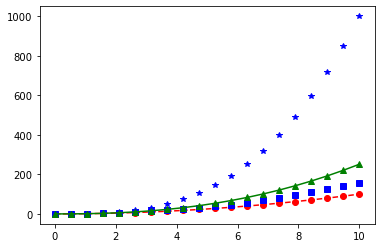

In [252]:
x=np.linspace(0,10,20)
y=x**2
plt.plot(x,y,'r--o')
plt.plot(x, y**1.5, 'b*')
plt.plot(x, y ** 1.1, 'bs')
plt.plot(x, y ** 1.2, 'g^-')
plt.show()

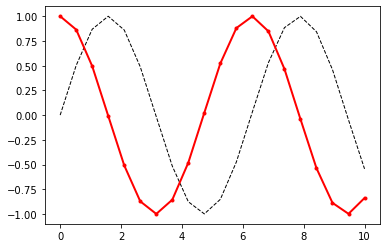

In [263]:
plt.plot(x,np.sin(x),'k--',linewidth=1)
plt.plot(x,np.cos(x),'r.-',linewidth=2)

In [265]:
from numpy.random import randn

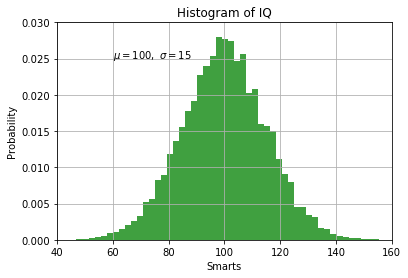

In [268]:
mu, sigma = 100, 15
x = mu + sigma * randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

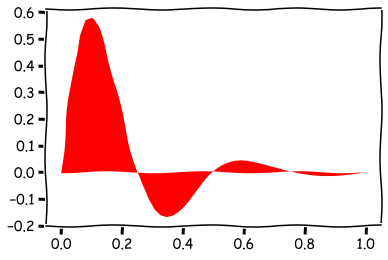

In [269]:

with plt.xkcd():
    x = np.linspace(0, 1)
    y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

    plt.fill(x, y, 'r')
    plt.grid(False)

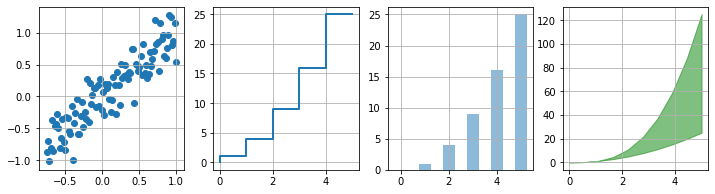

In [274]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)
x = np.linspace(0, 5, 10)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].grid(True)

axes[1].step(n, n**2, lw=2)
axes[1].grid(True)

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].grid(True)

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].grid(True)

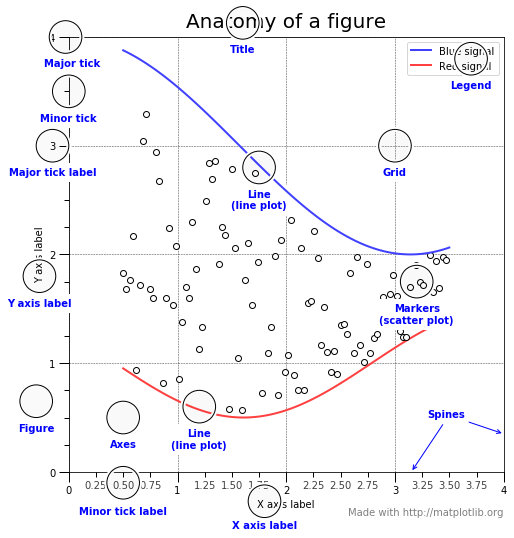

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

## BASEMAP

not supproted anymore

In [276]:
import matplotlib.pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import pandas as pd
#plt.rcParams['figure.figsize'] = 7, 8

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
x1 = -20.
x2 = 40.
y1 = 32.
y2 = 64.
 
m = Basemap(resolution='l',projection='merc',\
            llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,\
            urcrnrlon=x2,lat_ts=(x1+x2)/2)

In [ ]:

plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1.0);

In [ ]:
lat = 53.565278
lon = 10.001389

In [ ]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1.0);
m.scatter(lon,lat,300)

In [ ]:
print(' xmin {}\n xmax {}\n ymin {}\n ymax {}'.format(str(m.xmin),str(m.xmax),str(m.ymin),str(m.ymax)))

In [ ]:
x,y = m(lon,lat)

In [ ]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1.0);
m.scatter(x,y,300)

In [ ]:

plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.scatter(x,y,300)

In [ ]:

plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='gray',lake_color='aqua')
m.scatter(x,y,300)

In [ ]:

plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='gray',lake_color='aqua',alpha=0.1)
m.scatter(x,y,300,zorder=10);

In [ ]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',lake_color='aqua',alpha=0.5)
m.drawmeridians(np.arange(0,360,10),labels=[False,True,True,False])
m.drawparallels(np.arange(-90,90,10),labels=[False,True,True,False])
m.drawmapscale(33,35,0,40,1000,barstyle='fancy')
m.scatter(x,y,300,zorder=10)
plt.text(x+200000,y-20000,"Hamburg",color='red',size=14);

In [ ]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',lake_color='aqua',alpha=0.5)
m.etopo()
m.scatter(x,y,300,zorder=10)

In [ ]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',alpha=0.5)
m.bluemarble()
m.scatter(x,y,300,zorder=10)

In [ ]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',alpha=0.5)
m.shadedrelief()
m.scatter(x,y,300,zorder=10)

In [ ]:
#!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc

#  Put data on a MAP

In [277]:
from netCDF4 import Dataset

In [281]:
# !wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/air.2m.gauss.2016.nc
#Alternative for the times of US goverment shutdowns:
#!wget http://database.rish.kyoto-u.ac.jp/arch/ncep/data/ncep.reanalysis/surface/air.sig995.2012.nc
import requests

print('Beginning file download with requests')

url = 'http://database.rish.kyoto-u.ac.jp/arch/ncep/data/ncep.reanalysis/surface_gauss/air.2m.gauss.2016.nc'
r = requests.get(url)

with open('air.2m.gauss.2016.nc', 'wb') as f:
    f.write(r.content)

# Retrieve HTTP meta-data
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

Beginning file download with requests
200
application/x-netcdf
None


In [282]:
fl = Dataset('./air.2m.gauss.2016.nc')
air = fl.variables['air'][0,:,:]
lat = fl.variables['lat'][:]
lon = fl.variables['lon'][:]

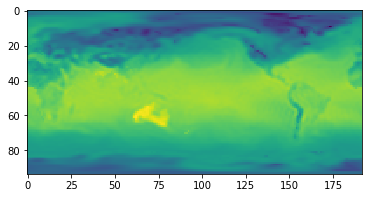

In [283]:

plt.imshow(air)

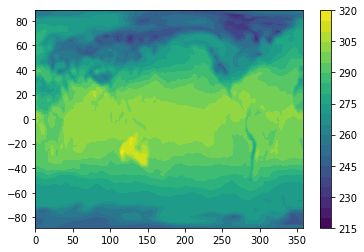

In [284]:

plt.contourf(lon,lat,air,20)
plt.colorbar();

In [285]:
lon.shape

(192,)

In [286]:
# 2 d arrays
lon2, lat2 = np.meshgrid(lon,lat)

In [287]:
lon2.shape

(94, 192)

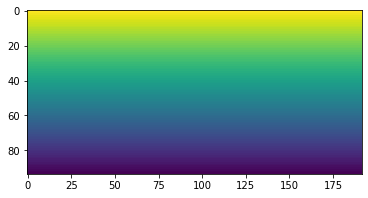

In [288]:
plt.imshow(lat2)

In [289]:

m = Basemap(projection='ortho',lat_0=45,lon_0=0,resolution='l')
x, y = m(lon2, lat2)


NameError: name 'Basemap' is not defined

In [290]:

m = Basemap(projection='ortho',lat_0=45,lon_0=0,resolution='l')
x, y = m(lon2, lat2)


NameError: name 'Basemap' is not defined

In [ ]:
fig = plt.figure(figsize=(15,7))
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
cs = m.contourf(x,y,air,20)
plt.title('Monthly mean SAT');

In [ ]:

lon

In [291]:
from mpl_toolkits.basemap import addcyclic

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [292]:
lon_cyc

NameError: name 'lon_cyc' is not defined

In [293]:
lon2, lat2 = np.meshgrid(lon_cyc,lat)

NameError: name 'lon_cyc' is not defined

In [294]:
m = Basemap(projection='ortho',lat_0=45,lon_0=0,resolution='l')
x, y = m(lon2, lat2)

NameError: name 'Basemap' is not defined

In [295]:

fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar();

NameError: name 'm' is not defined

<Figure size 720x504 with 0 Axes>

In [ ]:
air_cyc.shape
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar(orientation='horizontal', pad = 0.03);

In [ ]:
m = Basemap(projection='robin',lon_0=180,resolution='c')
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar(orientation='horizontal', pad = 0.03);

- https://matplotlib.org/basemap/users/examples.html
- http://www.pyngl.ucar.edu/Examples/gallery.shtml

- https://github.com/mikedewar/d3py

## cartopy

In [296]:
import matplotlib.pylab as plt
from matplotlib import cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ModuleNotFoundError: No module named 'cartopy'

In [ ]:

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

In [ ]:

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())

https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

In [ ]:
lt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())

In [ ]:

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )

In [ ]:

from netCDF4 import Dataset
fl = Dataset('./air.2m.gauss.2016.nc')
air = fl.variables['air'][0,:,:]
lat = fl.variables['lat'][:]
lon = fl.variables['lon'][:]

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
ax.contourf(lon, lat, air, transform=ccrs.PlateCarree())

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
ax.contourf(lon, lat, air, transform=ccrs.PlateCarree())

In [ ]:
air_cyc, lon_cyc = add_cyclic_point(air, coord=lon)

In [ ]:

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
ax.contourf(lon_cyc, lat, air_cyc, transform=ccrs.PlateCarree())

In [ ]:
lon2d, lat2d = np.meshgrid(lon_cyc, lat)

In [ ]:

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
ax.contourf(lon2d, lat2d, air_cyc, transform=ccrs.PlateCarree())

In [ ]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
ax.contourf(lon_cyc, lat, air_cyc, transform=ccrs.PlateCarree(), levels = np.linspace(275,300,51))


In [ ]:

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
image = ax.contourf(lon_cyc,
                    lat,
                    air_cyc,
                    transform=ccrs.PlateCarree(),
                    levels = np.linspace(275,300,51), 
                    extend='both')
cb = plt.colorbar(image, orientation='horizontal', pad=0.03, shrink = 0.8)
cb.ax.tick_params(labelsize=12)
cb.set_label('K', size=20)

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
image = ax.contourf(lon_cyc,
                    lat,
                    air_cyc,
                    transform=ccrs.PlateCarree(),
                    levels = np.linspace(275,300,51), 
                    extend='both')
cb = plt.colorbar(image, orientation='horizontal', pad=0.08, shrink = 0.8)
cb.ax.tick_params(labelsize=12)
cb.set_label('K', size=20)
gl = ax.gridlines(draw_labels=True) # Only PlateCarree and Mercator plots are currently 